In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# adni_file_name = '~/adni_flat_dataset/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001114556321_S13408_I118671_2006-04-18_08_20_30.0.nii'
# test_load = nib.load(adni_file_name).get_fdata()
# print(test_load.shape)

# #this will plot full siz size 
# plt.imshow(test_load[:,:,test_load.shape[2]//2])
# plt.show()

In [14]:
import os

def find_files_with_substring(directory, substring):
    matching_files = [f for f in os.listdir(directory) if substring in f]
    return matching_files

def get_nib_image(adni_file_name):
    return nib.load(adni_file_name).get_fdata()

def visualize_image(nib_image):
    plt.imshow(nib_image[:,:,nib_image.shape[2]//2])
    plt.show()

In [2]:
# TODO: Implement a simple function which returns the subject's image files in nib format based on subject id and optional date.
# Use the dip_project/adni_subject_file_ma.json to search for the file(s) or, os paths.
def get_image_files_for_subject(subject_id, date=None):
    os.path.expanduser("~/adni_flat_dataset")
    dir_ = "/home/rittikar-s/adni_flat_dataset"
    files = find_files_with_substring(dir_, subject_id)
    if date:
        files = [file for file in files if date in file]

    nib_images = []
    for file in files:
        nib_image = get_nib_image(f"{dir_}/{file}")
        nib_images.append(nib_image)
    return nib_images

In [3]:
import pandas as pd

df = pd.read_csv("ADNI1_Complete_1Yr_1.5T_1_26_2025.csv")

/home/rittikar-s/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97341,941_S_1311,MCI,M,70,m06,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN
2,I97327,941_S_1311,MCI,M,69,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN
3,I105437,941_S_1202,CN,M,79,m12,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,NaN
4,I63874,941_S_1202,CN,M,78,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN


In [5]:
df["Group"].value_counts()

Group
MCI    1113
CN      705
AD      476
Name: count, dtype: int64

In [6]:
print(min(df["Subject"].value_counts()))
print(max(df["Subject"].value_counts()))

3
6


## Max 6 and Min 3 visits per subject

In [7]:
df_unique = df.drop_duplicates(subset=["Subject"])

In [8]:
df_unique["Sex"].value_counts()

Sex
M    372
F    267
Name: count, dtype: int64

In [9]:
print(min(df_unique["Age"]))
print(max(df_unique["Age"]))

55
90


In [10]:
df_unique["Group"].value_counts()

Group
MCI    311
CN     195
AD     133
Name: count, dtype: int64

In [19]:
image_files = get_image_files_for_subject("941_S_1311", "09-27-2007")

In [21]:
# Convert to a NumPy array
image_data = image_files[0]
print("Image shape:", image_data.shape)
image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))

Image shape: (192, 192, 160)


In [22]:
import scipy.ndimage

target_shape = (128, 128, 128)  # Example size
image_resized = scipy.ndimage.zoom(image_data, 
                                   np.array(target_shape) / np.array(image_data.shape),
                                   order=1)  # Order 1 = bilinear interpolation

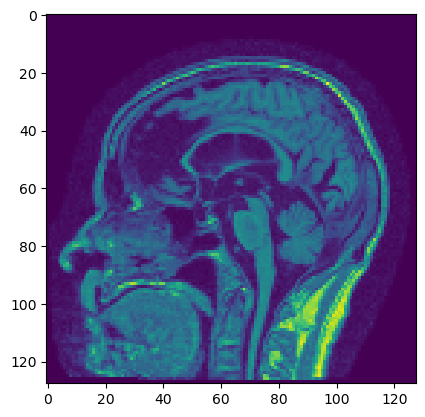

In [23]:
plt.imshow(image_resized[:,:,image_resized.shape[2]//2])